In [ ]:
!git clone https://github.com/twpkevin06222/Liver-Segmentation-Project-.git medical_imaging

Cloning into 'medical_imaging'...
remote: Enumerating objects: 581, done.
remote: Total 581 (delta 0), reused 0 (delta 0), pack-reused 581 (from 1)
Receiving objects: 100% (581/581), 299.41 MiB | 21.86 MiB/s, done.
Resolving deltas: 100% (181/181), done.
Updating files: 100% (119/119), done.


In [23]:
pip install keras

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import keras.backend as k
from keras.utils import to_categorical
from keras import metrics
from keras.models import Model, load_model, Sequential
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout, Maximum, Flatten
from keras.layers import Lambda, RepeatVector, Reshape
from keras.layers import Conv2D, Conv2DTranspose, Conv3D, Conv3DTranspose
from keras.layers import MaxPooling2D, GlobalMaxPool2D, MaxPooling3D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from sklearn.utils import class_weight

from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping

from PIL import Image
# Instead of:
# from keras.preprocessing import ImageDataGenerator

# Use this if using tf.keras.utils.image_dataset_from_directory:
from tensorflow.keras.utils import image_dataset_from_directory

# OR Use this if using tf.keras.preprocessing.image.ImageDataGenerator:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
import h5py
from keras.layers import concatenate,UpSampling2D

In [ ]:
!pip install nibabel

In [30]:
import tensorflow as tf
import keras
print('Tensorflow version:', tf.__version__)
print('Keras version:', keras.__version__)

Tensorflow version: 2.18.0
Keras version: 3.8.0


In [32]:
import glob
import nibabel as nib

def three_to_two(path, label='FALSE'):
    ff = sorted(glob.glob(path))
    images = []
    for f in range(len(ff)):
        a = nib.load(ff[f])
        # Changed line: Using get_fdata() instead of get_data()
        a = a.get_fdata()
        for i in range(a.shape[2]):
            images.append(a[:, :, i])
    images = np.asarray(images)
    return images

# ... rest of your code ...

def min_max_norm(images):
    m = np.max(images)
    mi = np.min(images)
    images = (images - mi)/ (m - mi)
    return images

def label_outliers(img_labels):
    img_labels[img_labels>1]=1
    img_labels[img_labels<0]=0
    return img_labels

#Image for training
images = three_to_two(path='medical_imaging/tmp/tmp_img/img_new/*')
x_data = min_max_norm(images)

#labels
img_labels = three_to_two(path='medical_imaging/tmp/tmp_img/img_new_label/*')
y_data = label_outliers(img_labels)

#Test Image
img_test = three_to_two(path='medical_imaging/tmp/tmp_img/test_img/*')
x_test = min_max_norm(img_test)

#Test Labels
label_test = three_to_two(path='medical_imaging/tmp/tmp_img/test_img_label/*')
y_test = label_outliers(label_test)

In [33]:
x_data.shape

(3036, 128, 128)

In [34]:
y_data.shape

(3036, 128, 128)

In [35]:
x_test.shape

(735, 128, 128)

In [36]:
y_test.shape

(735, 128, 128)

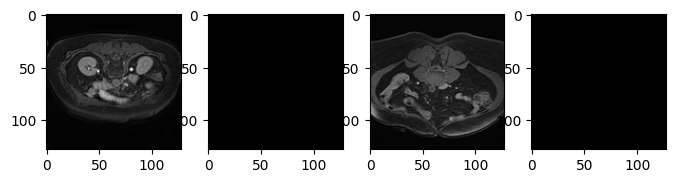

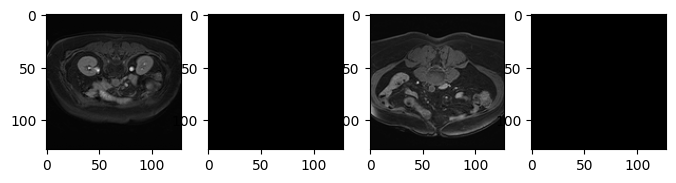

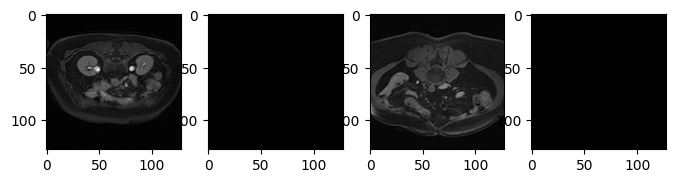

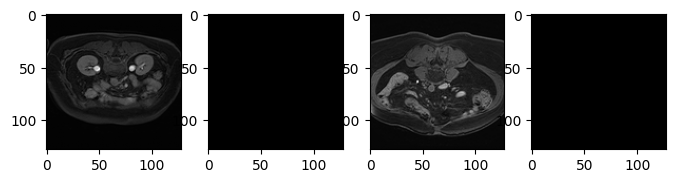

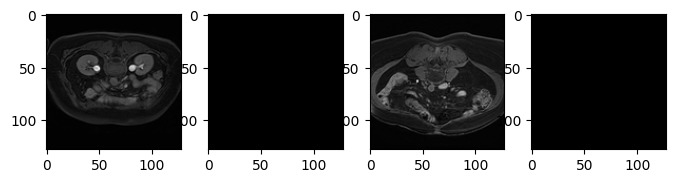

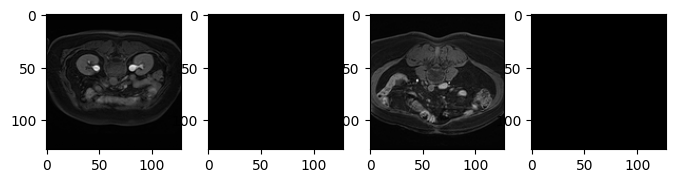

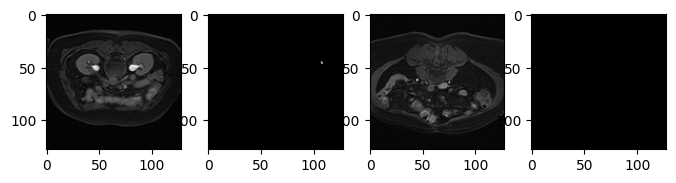

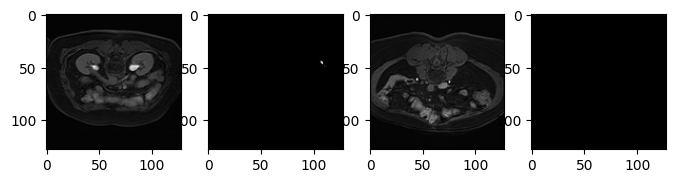

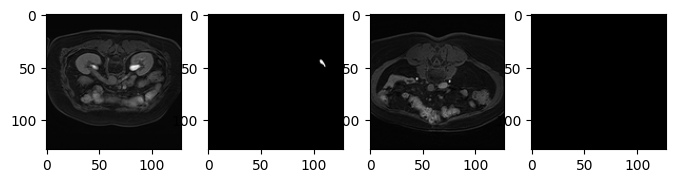

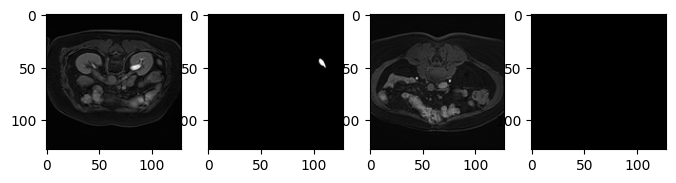

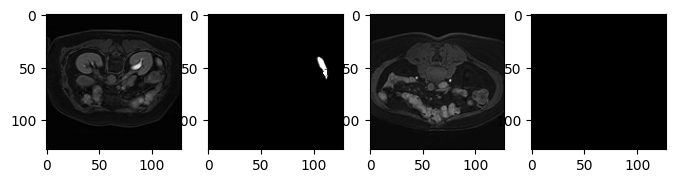

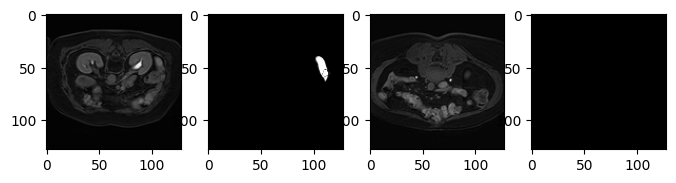

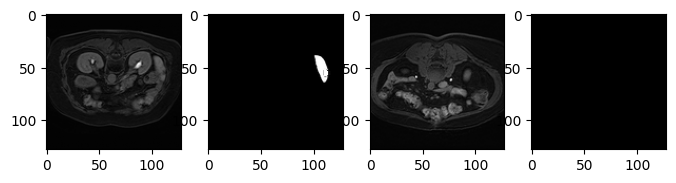

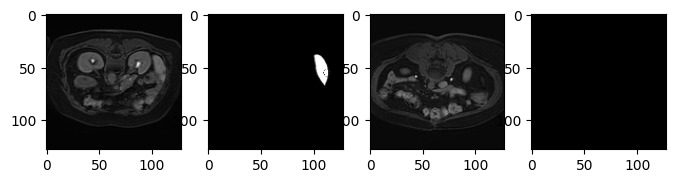

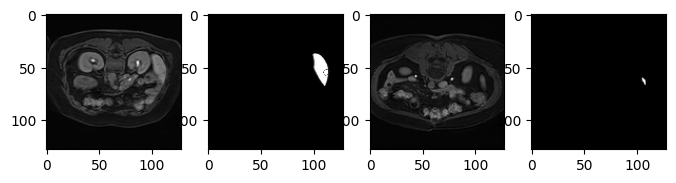

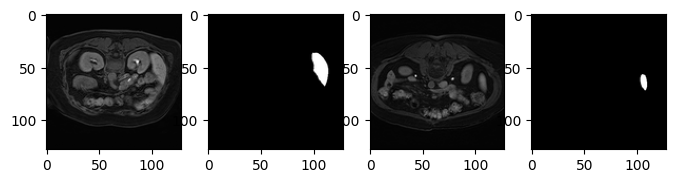

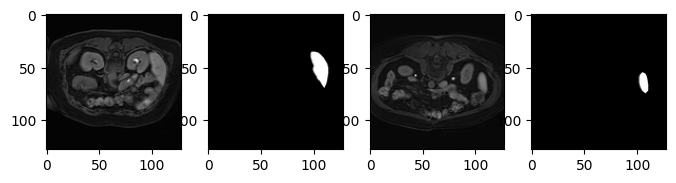

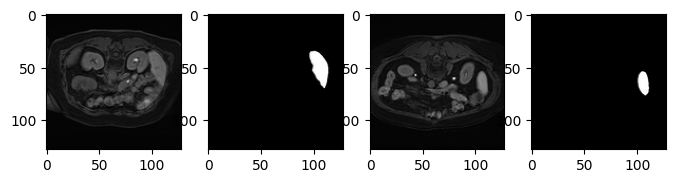

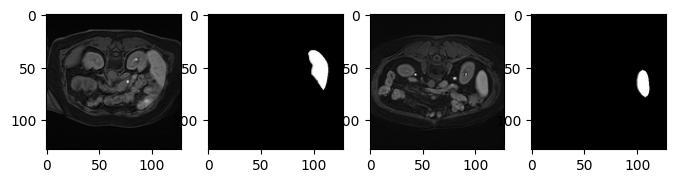

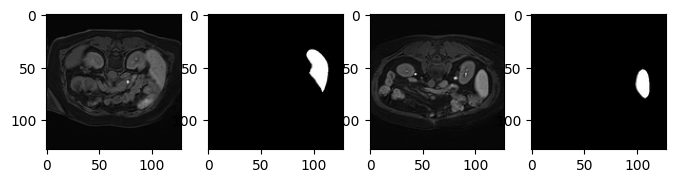

In [37]:
for i in range(20):
    fig, ax = plt.subplots(1,4, figsize = (8,4))
    ax[0].imshow(x_data[i], cmap='gray')
    ax[1].imshow(y_data[i], cmap='gray')
    ax[2].imshow(x_test[i], cmap='gray')
    ax[3].imshow(y_test[i], cmap='gray')

plt.show()

In [38]:
x_data = x_data[:,:,:,np.newaxis] # same as reshape (-1,128,128,1)
y_data = y_data[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]
y_test = y_test[:,:,:,np.newaxis]

print('Dimension for training data:', x_data.shape)
print('Dimension for training data labels:', y_data.shape)
print('Dimension for test data:', x_test.shape)
print('Dimension for test data labels:', y_test.shape)

Dimension for training data: (3036, 128, 128, 1)
Dimension for training data labels: (3036, 128, 128, 1)
Dimension for test data: (735, 128, 128, 1)
Dimension for test data labels: (735, 128, 128, 1)


In [39]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.2, random_state =42)
x_test, y_test = shuffle(x_test, y_test, random_state= 42)

In [40]:
x_train.shape

(2428, 128, 128, 1)

In [41]:
y_train.shape

(2428, 128, 128, 1)

In [42]:
x_test.shape

(735, 128, 128, 1)

In [43]:
y_test.shape

(735, 128, 128, 1)

In [62]:
from keras import backend as K
import tensorflow as tf # import tensorflow

def dice_coef(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(y_true) # Use tf.keras.backend.flatten
    y_pred_f = tf.keras.backend.flatten(y_pred) # Use tf.keras.backend.flatten
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f) # Use tf.keras.backend.sum instead of K.sum
    return (2. * intersection + tf.keras.backend.epsilon()) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + tf.keras.backend.epsilon()) # Use tf.keras.backend.sum and tf.keras.backend.epsilon instead of K.sum and K.epsilon

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [63]:
input_layer = Input(shape=x_train.shape[1:])

In [64]:
input_layer.shape

(None, 128, 128, 1)

In [65]:
pip install merge

In [66]:
def lenet():
    Model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(6, (5, 5),(1,1), activation='relu', input_shape=input_layer),
        tf.keras.layers.MaxPooling2D((2, 2),(2,2)),
        tf.keras.layers.Conv2D(16, (5, 5),(1,1), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2),(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    return Model

def conv_block(x_in, filters, batch_norm, kernel_size=(3,3)):
    x = Conv2D(filters, kernel_size, padding='same')(x_in)
    if batch_norm=='TRUE':
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    if batch_norm=='TRUE':
        x = BatchNormalization()(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def conv_2d(x_in, filters, batch_norm, kernel_size=(3,3),acti ='relu'):
    x = Conv2D(filters, kernel_size, padding='same')(x_in)
    if batch_norm=='TRUE':
        x=BatchNormalization()(x)
    x= Activation(acti)(x)
    return x

def pool(x_in, pool_size=(2, 2), type='Max'):
    if type=='Max':
        p = MaxPooling2D(pool_size)(x_in)
    return p

def up(x_in, filters, merge, batch_norm, size=(2,2)):
    u = UpSampling2D(size)(x_in)
    conv = conv_block(u, filters, batch_norm)
    merge=concatenate([merge, conv],axis=-1)
    return merge

def CNN(input_layer):
    conv1 = conv_block(input_layer, filters=16, batch_norm='TRUE')
    pool1 = pool(conv1)

    conv2 = conv_block(pool1, filters=32, batch_norm='TRUE')
    pool2 = pool(conv2)

    conv3 = conv_block(pool2, filters=32, batch_norm='TRUE')
    pool3 = pool(conv3)

    conv4 = conv_block(pool3, filters=64, batch_norm='TRUE')
    pool4 = pool(conv4)

    conv5 = conv_2d(pool4, filters=128, batch_norm='TRUE')

    up1 = up(conv5,filters=128, merge=conv4, batch_norm='TRUE')
    conv6 = conv_2d(up1, filters=128, batch_norm='TRUE')

    up2 = up(conv6, filters=128, merge=conv3, batch_norm='TRUE')
    conv7 = conv_2d(up2, filters=128, batch_norm='TRUE')

    up3 = up(conv7, filters=64, merge=conv2, batch_norm='TRUE')
    conv8 = conv_2d(up3, filters=64, batch_norm='TRUE')

    up4 = up(conv8, filters=32, merge=conv1, batch_norm='TRUE')
    conv9 = conv_2d(up4, filters=32, batch_norm='TRUE')

    conv10 = conv_2d(conv9, filters=1, batch_norm='FALSE', acti='sigmoid')

    output_layer = conv10
    model = Model(input_layer, output_layer)

    return model

In [67]:
model = CNN(input_layer)

In [68]:
model.compile(optimizer=Adam(1e-4), loss= dice_coef_loss, metrics=[dice_coef])

In [69]:
from tensorflow.keras import layers

In [70]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 85s 469ms/step - dice_coef: 0.2430 - loss: 0.7570 - val_dice_coef: 0.1175 - val_loss: 0.8825
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - dice_coef: 0.6250 - loss: 0.3750 - val_dice_coef: 0.1012 - val_loss: 0.8988
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - dice_coef: 0.7935 - loss: 0.2065 - val_dice_coef: 0.1863 - val_loss: 0.8137
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - dice_coef: 0.8631 - loss: 0.1369 - val_dice_coef: 0.3544 - val_loss: 0.6456
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - dice_coef: 0.8996 - loss: 0.1004 - val_dice_coef: 0.6580 - val_loss: 0.3420
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - dice_coef: 0.9174 - loss: 0.0826 - val_dice_coef: 0.8060 - val_loss: 0.1940
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - dice_coef: 0.9290 - loss: 0.0710 - val_dice_coef: 0.8767 - val_loss: 0.1233
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - dice_coef: 0.9361 - loss: 0.

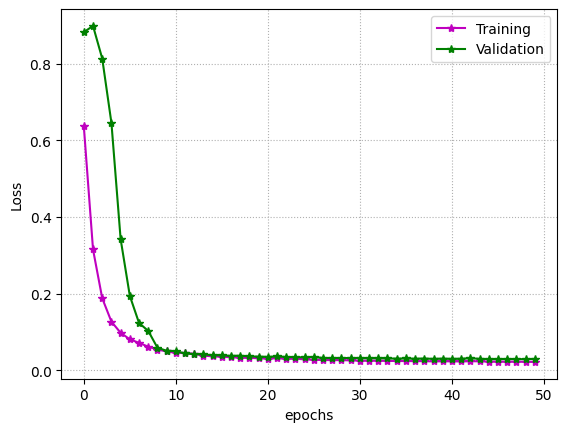

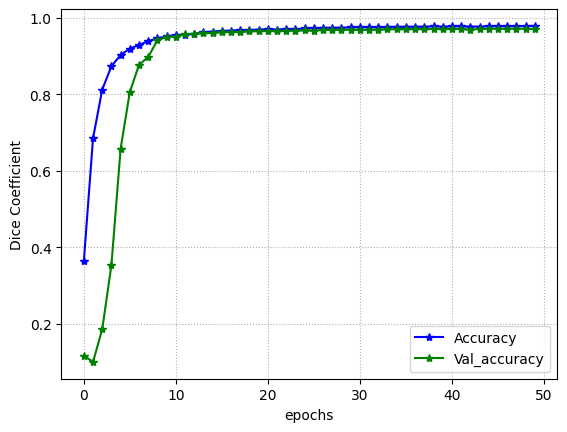

In [71]:
plt.plot(hist.history['loss'], color='m', marker = '*',label='Training')
plt.plot(hist.history['val_loss'], color='g', marker = '*',label='Validation')
plt.legend(loc='upper right')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.grid(linestyle='dotted')
plt.show()

plt.plot(hist.history['dice_coef'], color='b',marker = '*', label='Accuracy')
plt.plot(hist.history['val_dice_coef'], color='g',marker = '*', label='Val_accuracy')
plt.xlabel("epochs")
plt.ylabel("Dice Coefficient")
plt.legend(loc='lower right')
plt.grid(linestyle='dotted')
plt.show()

In [72]:
test_eval = model.evaluate(x_test, y_test, verbose=1, batch_size = 32)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 321ms/step - dice_coef: 0.9244 - loss: 0.0756
Test loss: 0.07307100296020508
Test accuracy: 0.9268597960472107


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step


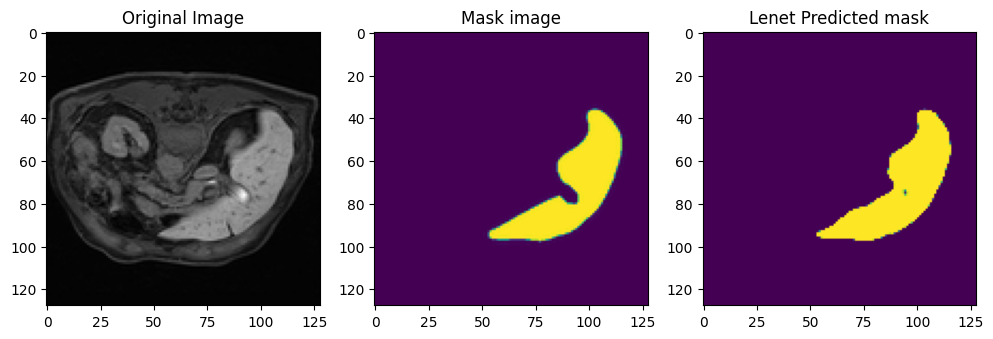

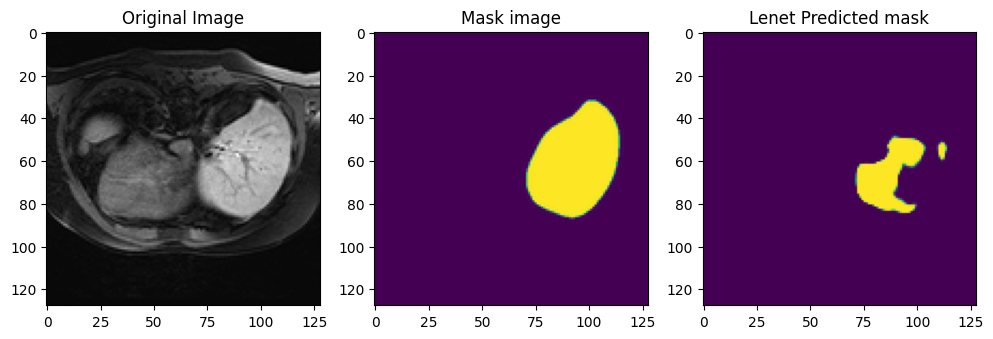

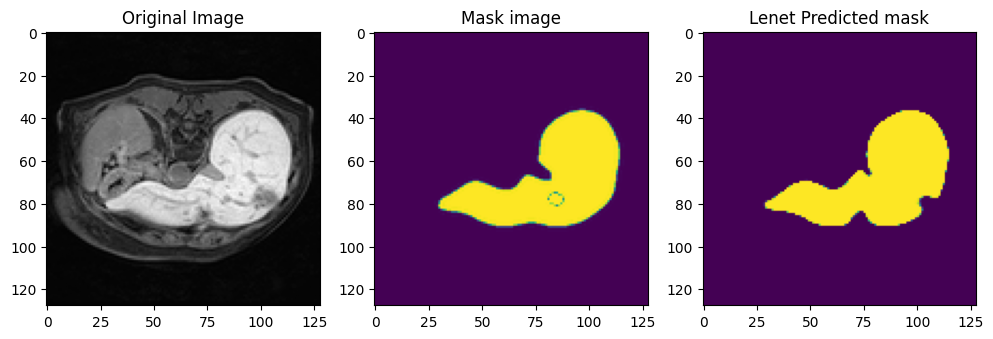

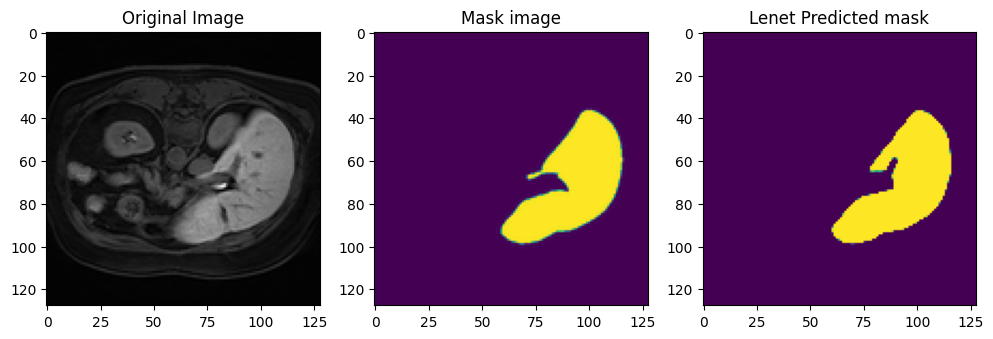

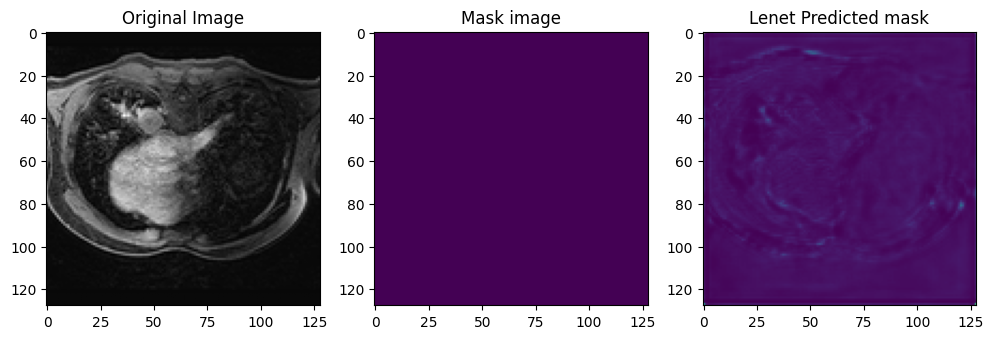

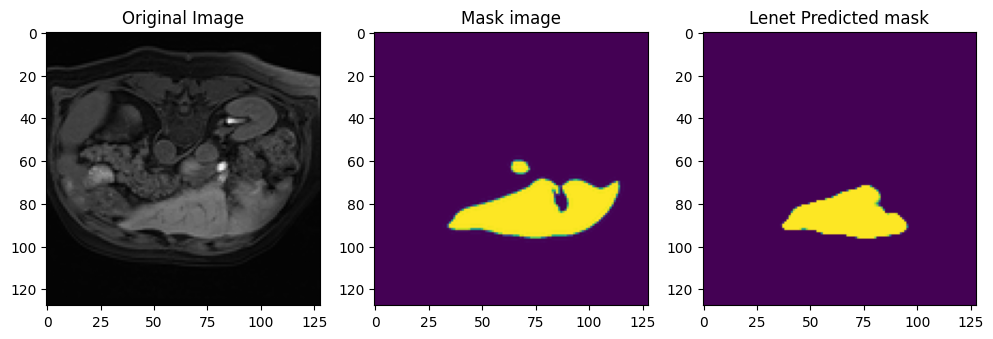

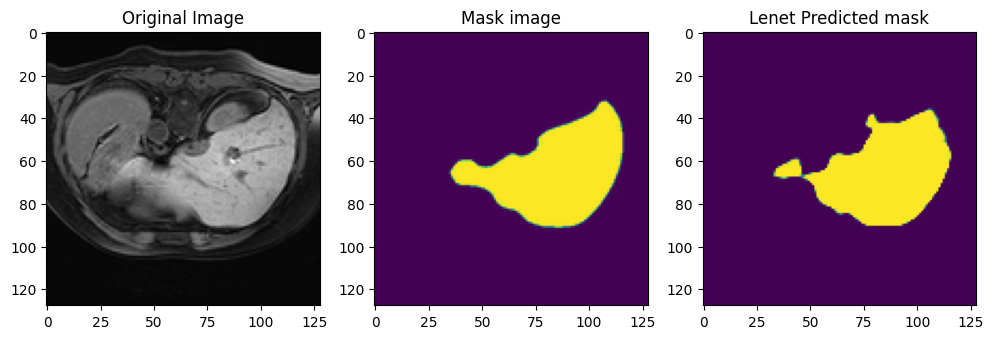

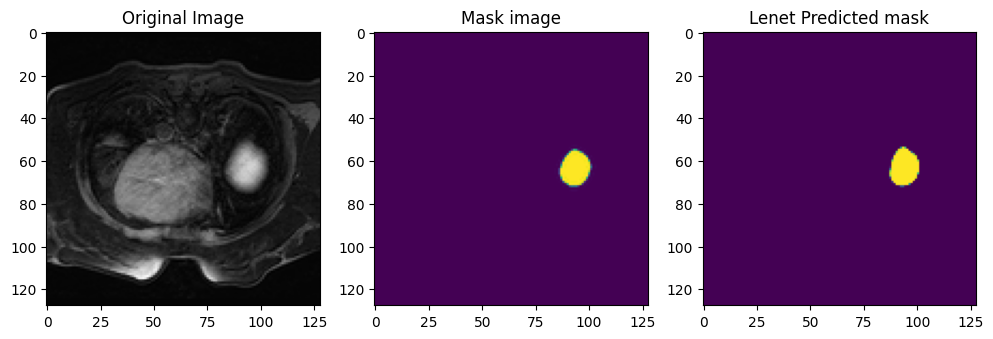

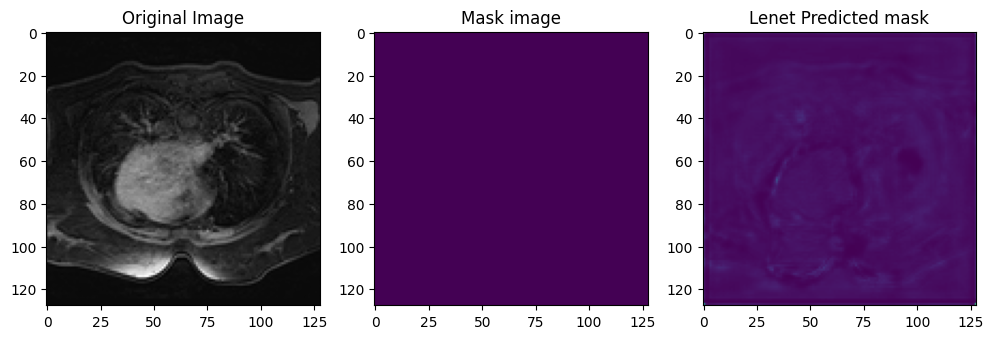

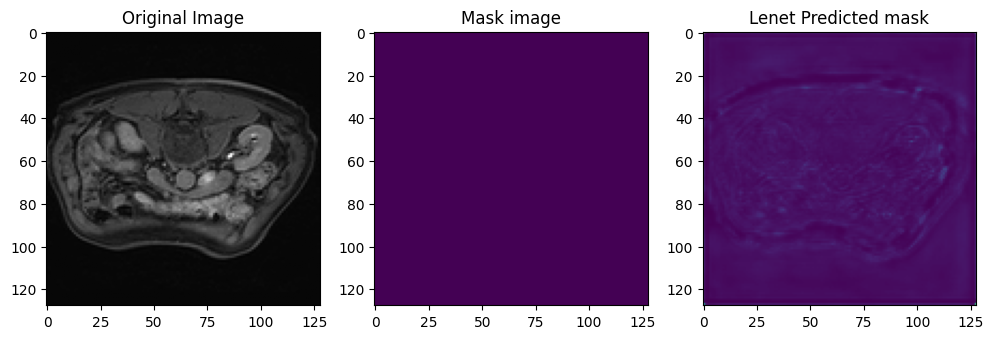

In [73]:
y_pred = model.predict(x_test)
for i in range(0,20,2):
    fig, ax = plt.subplots(1,3,figsize=(12,6))
    ax[0].imshow(x_test[i,:,:,0], cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(y_test[i,:,:,0], cmap='viridis')
    ax[1].set_title('Mask image')
    ax[2].imshow(y_pred[i,:,:,0], cmap='viridis')
    ax[2].set_title('Lenet Predicted mask')
plt.show()